# Imports and Data Generation

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import torch


two_pi = 2*pi

def circle_points(r, n):
    circles = []
    for r, n in zip(r, n):
        t = np.linspace(0, two_pi, n)
        x = r * np.cos(t)
        y = r * np.sin(t)
        circles.append(np.c_[x, y])
    return circles

# Utility

In [2]:
def class_plot(X, y_ally, y_advr, aspect=True, title=False, orig=True, save=False):
    X_tsne = TSNE(n_components=2).fit_transform(X)
    X_pca = PCA(n_components=2).fit_transform(X)
    
    
    markers = ['x', 'o', 'x', 'o']
    colors = ['r', 'b']
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    t1, t2 = '(a)', '(b)'
    for i in range(2):
        for j in range(2):
            tmp = X[np.intersect1d(np.where(y_ally == i)[0], np.where(y_advr == j)[0])]
            ax1.scatter(tmp[:, 0], tmp[:, 1], c=colors[i], marker=markers[2*i+j])
    ax1.axis('equal')
    ax1.set_title(t1, y= -0.2)
    
    for i in range(2):
        for j in range(2):
            tmp = X_pca[np.intersect1d(np.where(y_ally == i)[0], np.where(y_advr == j)[0])]
            ax2.scatter(tmp[:, 0], tmp[:, 1], c=colors[i], marker=markers[2*i+j])
    ax2.axis('equal')
    ax2.set_title(t2, y= -0.2)
    plt.show()
  

In [13]:
def class_plot_1d(X, y_ally, y_advr, aspect=True, title=False, orig=True, save=False, axis=0):
    X_tsne = TSNE(n_components=1).fit_transform(X)
    X_pca = PCA(n_components=1).fit_transform(X)
    
    
    markers = ['x', 'o', 'x', 'o']
    colors = ['r', 'b']
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    t1, t2 = '(a)', '(b)'
    for i in range(2):
        for j in range(2):
            tmp = X[np.intersect1d(np.where(y_ally == i)[0], np.where(y_advr == j)[0])]
            if axis==0:
                ax1.scatter(tmp[:, 0], np.zeros_like(tmp[:, 0]), c=colors[i], marker=markers[2*i+j])
            else:
                ax1.scatter(np.zeros_like(tmp[:, 0]), tmp[:, 0],  c=colors[i], marker=markers[2*i+j])
    ax1.axis('equal')
    ax1.set_title(t1, y= -0.2)
    
    for i in range(2):
        for j in range(2):
            tmp = X_pca[np.intersect1d(np.where(y_ally == i)[0], np.where(y_advr == j)[0])]
            if axis==0:
                ax2.scatter(tmp[:, 0], np.zeros_like(tmp[:, 0]), c=colors[i], marker=markers[2*i+j])
            else:
                ax2.scatter(np.zeros_like(tmp[:, 0]), tmp[:, 0],  c=colors[i], marker=markers[2*i+j])
    ax2.axis('equal')
    ax2.set_title(t2, y= -0.2)
    plt.show()
  
  

In [14]:
r = [10, 20]
n = [32, 32]
circles = circle_points(r, n)

ally_label = 0
advr_label = 0

X, y_ally, y_advr = [], [], []

for circle in circles:
    pos = circle[np.where(circle[:, 1]> 0)]
    neg = circle[np.where(circle[:, 1]<= 0)]
    X.append(pos)
    X.append(neg)
    y_ally.append([ally_label] * circle.shape[0])
    y_advr.append([advr_label] * pos.shape[0] + [advr_label+1] * neg.shape[0])
    ally_label += 1
    
X = np.concatenate(X, axis=0)
y_ally = np.concatenate(y_ally).reshape(-1, 1)
y_advr = np.concatenate(y_advr).reshape(-1, 1)
X.shape, y_ally.shape, y_advr.shape

((64, 2), (64, 1), (64, 1))

In [15]:
X, X_valid, y_ally, y_ally_valid, y_advr, y_advr_valid = train_test_split(X, y_ally, y_advr, test_size=0.3)
X.shape, X_valid.shape, y_ally.shape, y_ally_valid.shape, y_advr.shape, y_advr_valid.shape

((44, 2), (20, 2), (44, 1), (20, 1), (44, 1), (20, 1))

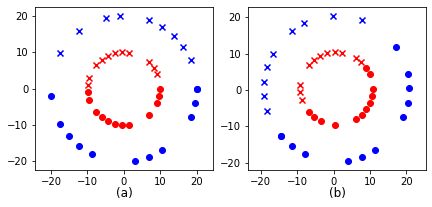

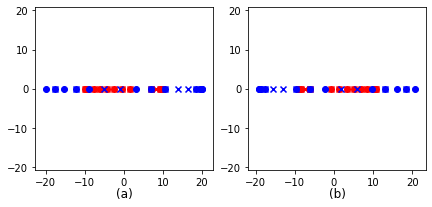

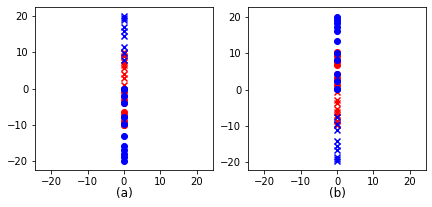

In [16]:
class_plot(X, y_ally, y_advr)
class_plot_1d(X[:, 0].reshape(-1, 1), y_ally, y_advr, axis=0)
class_plot_1d(X[:, 1].reshape(-1, 1), y_ally, y_advr, axis=1)

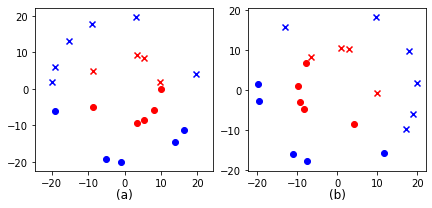

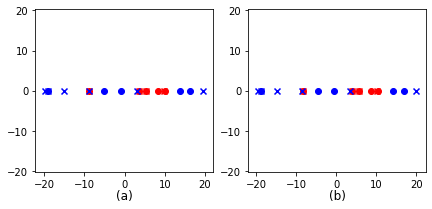

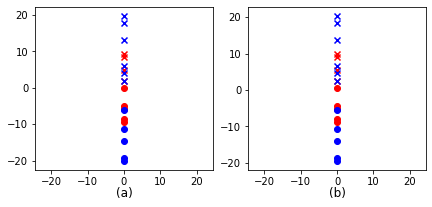

In [17]:
class_plot(X_valid, y_ally_valid, y_advr_valid)
class_plot_1d(X_valid[:, 0].reshape(-1, 1), y_ally_valid, y_advr_valid, axis=0)
class_plot_1d(X_valid[:, 1].reshape(-1, 1), y_ally_valid, y_advr_valid, axis=1)

### Idea

Basically we are trying to learn represenations of any given data in another transformed axes where classification becomes easier along one label but becomes tougher along another one.

- Here we want to differentiate between the two circles while not being able to tell between the two semicircles

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized_valid = scaler.transform(X_valid)

### Validation after scaling

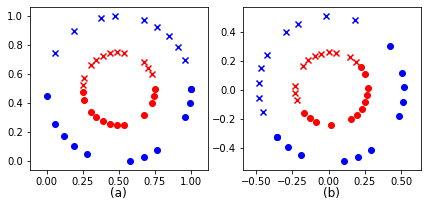

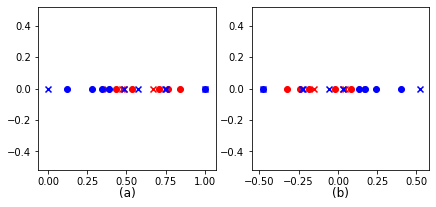

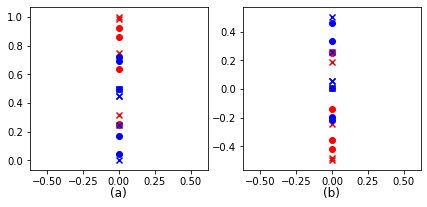

In [19]:
class_plot(X_normalized, y_ally, y_advr, title="Original Dataset")
class_plot_1d(X_normalized[:, 0].reshape(-1, 1), y_ally_valid, y_advr_valid, axis=0)
class_plot_1d(X_normalized[:, 1].reshape(-1, 1), y_ally_valid, y_advr_valid, axis=1)

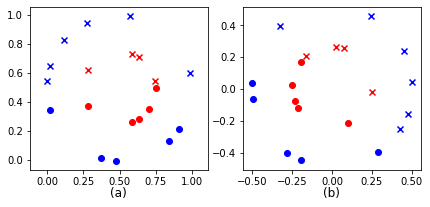

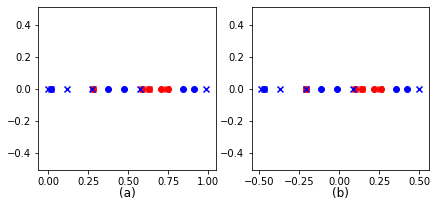

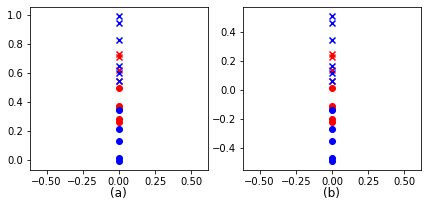

In [20]:
class_plot(X_normalized_valid, y_ally_valid, y_advr_valid, title="Original Dataset")
class_plot_1d(X_normalized_valid[:, 0].reshape(-1, 1), y_ally_valid, y_advr_valid, axis=0)
class_plot_1d(X_normalized_valid[:, 1].reshape(-1, 1), y_ally_valid, y_advr_valid, axis=1)

# PCA

In [21]:
pca = PCA()
X_pca = pca.fit_transform(X_normalized)
X_pca_valid = pca.transform(X_normalized_valid)

In [ ]:
class_plot(X_pca, y_ally, y_advr, title='PCA Represenation')

In [ ]:
class_plot(X_pca_valid, y_ally_valid, y_advr_valid, title='PCA Represenation')

# AutoEncoder

In [ ]:
class AutoEncoder(torch.nn.Module):
    def __init__(self, input_size, encoding_dim, hidden_size):
        super(AutoEncoder, self).__init__()
        self.input_size = input_size
        self.encoding_dim = encoding_dim
        self.hidden_size = hidden_size
        
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        
        self.fc11 = torch.nn.Linear(self.hidden_size, self.encoding_dim)
        self.relu = torch.nn.ReLU()
        
        self.fc2 = torch.nn.Linear(self.encoding_dim, self.hidden_size)
        self.sigmoid = torch.nn.Sigmoid()
        
        
        self.fc22 = torch.nn.Linear(self.hidden_size, self.input_size)
        self.sigmoid = torch.nn.Sigmoid()
        
    def encoder(self, x):
        return self.sigmoid(self.fc11(self.sigmoid(self.fc1(x))))

    def decoder(self, y):
        return self.sigmoid(self.fc22(self.sigmoid(self.fc2(y))))
    
    def forward(self, x):
        y = self.encoder(x)
        x = self.decoder(y)
        return x

In [ ]:
auto_encoder = AutoEncoder(
    input_size=X_normalized.shape[1],
    encoding_dim=X_normalized.shape[1], 
    hidden_size=X_normalized.shape[1]*2
)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam
ae_optimizer = optimizer(auto_encoder.parameters(), lr = 0.01)

In [ ]:
X_torch = torch.Tensor(X_normalized)
y_ally_torch = torch.Tensor(y_ally.reshape(-1, 1))
y_advr_torch = torch.Tensor(y_advr.reshape(-1, 1))

X_torch_valid = torch.Tensor(X_normalized_valid)
y_ally_torch_valid = torch.Tensor(y_ally_valid.reshape(-1, 1))
y_advr_torch_valid = torch.Tensor(y_advr_valid.reshape(-1, 1))

In [ ]:
print("epoch \t Aencoder_train \t Aencoder_valid")

ae_epoch = []
ae_train = []
ae_valid = []

for epoch in range(10001):
    auto_encoder.train()
    ae_optimizer.zero_grad()
    
    X_torch_hat = auto_encoder(X_torch)
    X_torch_hat_valid = auto_encoder(X_torch_valid)
    ae_loss = criterion(X_torch_hat, X_torch)
    ae_loss_valid = criterion(X_torch_hat_valid, X_torch_valid)
    ae_loss.backward(retain_graph=True)
    ae_optimizer.step()
    
    ae_epoch.append(epoch)
    ae_train.append(ae_loss.item())
    ae_valid.append(ae_loss_valid.item())
    
    if epoch%1000!=0:
        continue
    
    print('{} \t {:.8f} \t {:.8f}'.format(
        epoch, 
        ae_loss.item(),
        ae_loss_valid.item()
    ))
    

In [ ]:
plt.plot(ae_epoch, ae_train, 'r--')
plt.plot(ae_epoch, ae_valid, 'b--')
plt.legend(['train_loss'])
plt.title("autoencoder training")
plt.show()

In [ ]:
X_autoencoded = auto_encoder.encoder(X_torch_valid)

In [ ]:
class_plot(X_autoencoded.detach().numpy(), y_ally_valid, y_advr_valid, title='Autoencoder Representation')

In [ ]:
X_autodecoded = auto_encoder.decoder(X_autoencoded)

In [ ]:
class_plot(X_autodecoded.detach().numpy(), y_ally_valid, y_advr_valid)

# Privacy GAN

In [48]:
encoder.fc1.weight

Parameter containing:
tensor([[-0.7817],
        [-1.5738],
        [ 0.6315],
        [ 0.5803],
        [-0.8868],
        [ 0.4421],
        [ 1.3901],
        [-0.3559],
        [ 0.6086],
        [-0.5893],
        [-0.0380],
        [-0.8551],
        [-0.4106],
        [ 2.6013],
        [-3.2018],
        [-0.7520]], requires_grad=True)

In [49]:
torch.nn.init.normal_(encoder.fc1.weight)

Parameter containing:
tensor([[ 0.5246],
        [ 0.9423],
        [ 0.1156],
        [ 1.7682],
        [-0.7612],
        [-0.9265],
        [ 0.0678],
        [-1.0904],
        [-0.3972],
        [ 1.8044],
        [-0.2385],
        [ 0.1958],
        [ 1.0547],
        [-1.1823],
        [ 1.2584],
        [-0.9664]], requires_grad=True)

In [29]:
class Encoder(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Encoder, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        torch.nn.normal_(self.fc1.weight)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, self.output_size)
        torch.nn.normal_(self.fc2.weight)
        
        self.fc2 = torch.nn.Linear(self.hidden_size, self.output_size)
        torch.nn.normal_(self.fc2.weight)
        self.sigmoid = torch.nn.Sigmoid()
        self.tanh = torch.nn.Tanh()
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.tanh(output)
        return output


class Ally(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Ally, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, self.output_size)
        self.sigmoid = torch.nn.Sigmoid()
        self.tanh = torch.nn.Tanh()
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.relu(output)
        return output


class Adversary(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Adversary, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, self.output_size)
        self.sigmoid = torch.nn.Sigmoid()
        self.tanh = torch.nn.Tanh()
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.relu(output)
        return output

In [30]:
def train_privacy_gan(encoding_dimension, alpha, lr_encd, lr_ally, lr_advr, n_iter_gan, d_reps, plot=True, debug=True, axis=0):
    encoder = Encoder(
        input_size=X_torch.shape[1], 
        hidden_size=encoding_dimension*8, 
        output_size=encoding_dimension*4)
    ally = Ally(
        input_size=encoding_dimension*4, 
        hidden_size=encoding_dimension*8, 
        output_size=y_ally_torch.shape[1])
    adversary = Adversary(
        input_size=encoding_dimension*4, 
        hidden_size=encoding_dimension*8, 
        output_size=y_advr_torch.shape[1])

    criterion = torch.nn.BCEWithLogitsLoss()
    kldiv = torch.nn.KLDivLoss()
    l1_loss = torch.nn.L1Loss()
    optimizer = torch.optim.Adam
    encd_optimizer = optimizer(encoder.parameters(), lr = lr_encd)
    ally_optimizer = optimizer(ally.parameters(), lr=lr_ally)
    advr_optimizer = optimizer(adversary.parameters(), lr=lr_advr)

    if debug:
        print("epoch \t encoder_train \t ally_train \t advr_train")

    g_epoch = []
    enc_train = []
    enc_valid = []
    ally_train = []
    ally_valid = []
    advr_train = []
    advr_valid = []
    
    encoder.train()
    ally.train()
    adversary.train()

    for epoch in range(n_iter_gan):
        # set for training
        # Forward passv
        X_ganencoded = encoder(X_torch)
        X_ganencoded_valid = encoder(X_torch_valid)
        y_ally_torch_hat = ally(X_ganencoded)
        y_ally_torch_hat_valid = ally(X_ganencoded_valid)
        y_advr_torch_hat = adversary(X_ganencoded)
        y_advr_torch_hat_valid = adversary(X_ganencoded_valid)
        # Compute Loss
        ally_loss = criterion(y_ally_torch_hat, y_ally_torch)
        ally_loss_valid = criterion(y_ally_torch_hat_valid, y_ally_torch_valid)
        advr_loss = ((len(y_advr_torch)/2) - l1_loss(y_advr_torch_hat, y_advr_torch))/(len(y_advr_torch)/2)
#         advr_loss = -criterion(y_advr_torch_hat, y_advr_torch)
#         advr_loss_valid = -criterion(y_advr_torch_hat_valid, y_advr_torch_valid)
        advr_loss_valid = ((len(y_advr_torch_valid)/2) - l1_loss(y_advr_torch_hat_valid, y_advr_torch_valid))/(len(y_advr_torch_valid)/2)
        encd_loss = alpha * ally_loss + (1- alpha) * advr_loss
        encd_loss_valid = alpha * ally_loss_valid + (1- alpha) * advr_loss_valid
        # Backward pass
        
        encd_optimizer.zero_grad()
        encd_loss.backward()
        encd_optimizer.step()

        for i in range(d_reps):
            X_ganencoded = encoder(X_torch)
            X_ganencoded_valid = encoder(X_torch_valid)
            y_ally_torch_hat = ally(X_ganencoded)
            y_ally_torch_hat_valid = ally(X_ganencoded_valid)
            ally_optimizer.zero_grad()
            ally_loss = criterion(y_ally_torch_hat, y_ally_torch)
            ally_loss_valid = criterion(y_ally_torch_hat_valid, y_ally_torch_valid)
            ally_loss.backward()
            ally_optimizer.step()
            
            X_ganencoded = encoder(X_torch)
            X_ganencoded_valid = encoder(X_torch_valid)
            y_advr_torch_hat = adversary(X_ganencoded)
            y_advr_torch_hat_valid = adversary(X_ganencoded_valid)
            advr_optimizer.zero_grad()
            advr_loss = criterion(y_advr_torch_hat, y_advr_torch)
            advr_loss_valid = criterion(y_advr_torch_hat_valid, y_advr_torch_valid)
            advr_loss.backward()
            advr_optimizer.step()
        if plot:
            g_epoch.append(epoch)
            enc_train.append(encd_loss.item())
            enc_valid.append(encd_loss_valid.item())
            ally_train.append(ally_loss.item())
            ally_valid.append(ally_loss_valid.item())
            advr_train.append(advr_loss.item())
            advr_valid.append(advr_loss_valid.item())
            
        if epoch%500!=0 and (debug or plot):
            continue

        if debug:
            print('{} \t {:.8f} \t {:.8f} \t {:.8f}'.format(
                epoch, 
                encd_loss.item(),
                ally_loss.item(),
                advr_loss.item(),
            ))
        
        X_ganencoded = encoder(X_torch_valid)
        class_plot_1d(X_ganencoded.detach().numpy(),y_ally_valid, y_advr_valid, False, axis=axis)
        X_ganencoded = encoder(X_torch)
        class_plot_1d(X_ganencoded.detach().numpy(),y_ally, y_advr, False, axis=axis)

    if plot:
        plt.plot(g_epoch, enc_train, 'r', g_epoch, enc_valid, 'r--')
        plt.plot(g_epoch, ally_train, 'b', g_epoch, ally_valid, 'b--')
        plt.plot(g_epoch, advr_train, 'g', g_epoch, advr_valid, 'g--')
        plt.legend([
            'encoder train loss', 'encoder valid loss',
            'ally train loss', 'ally train loss',
            'advr train loss', 'advr train loss',
        ])
        plt.title("GAN training")
        plt.show()            

        return encoder  

- maximize the divergence
- no dimensionality reduction here

In [31]:
alpha = 0.5
lr_encd = 0.001
lr_ally = 0.0001
lr_advr = 0.0001
n_iter_gan = 10001
d_reps = 1

# alpha = 0.5
# lr_encd = 0.01
# lr_ally = 0.001
# lr_advr = 0.0001
# n_iter_gan = 5001
# d_reps = 2

epoch 	 encoder_train 	 ally_train 	 advr_train
0 	 0.84094083 	 0.70541060 	 0.69039154


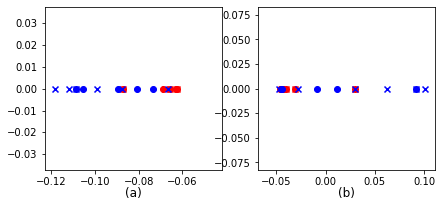

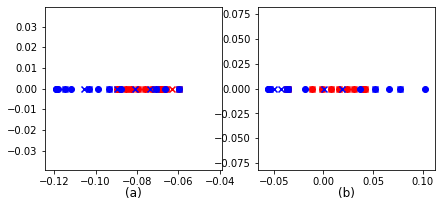

500 	 0.82389581 	 0.67026621 	 0.67797703


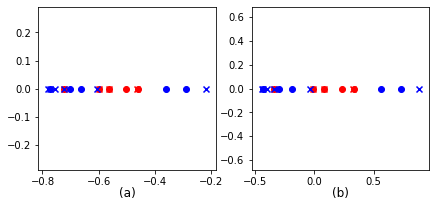

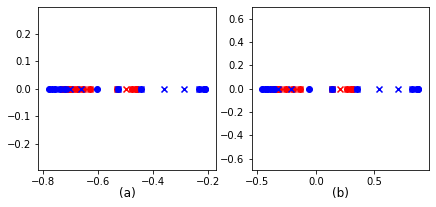

1000 	 0.80476308 	 0.63457298 	 0.66855216


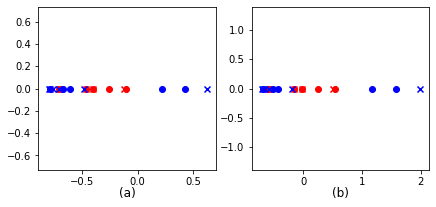

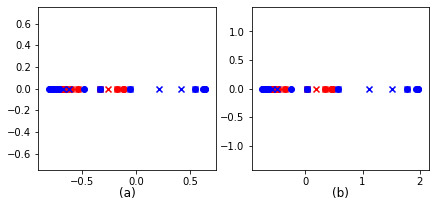

1500 	 0.78509754 	 0.59230399 	 0.67053205


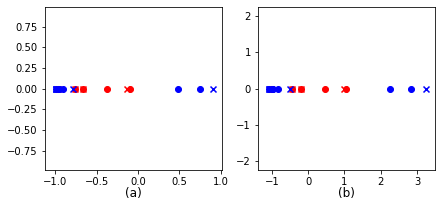

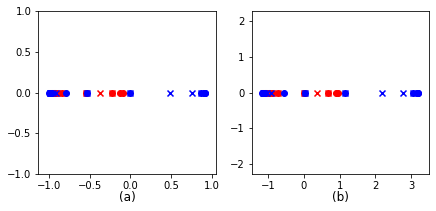

2000 	 0.77643120 	 0.57481456 	 0.67275947


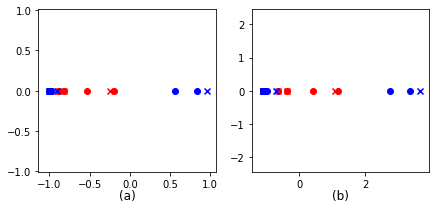

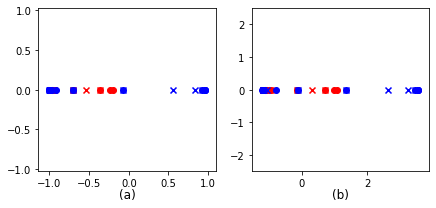

2500 	 0.77369869 	 0.56934762 	 0.67218900


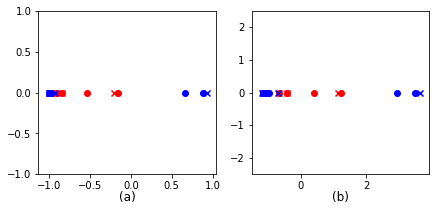

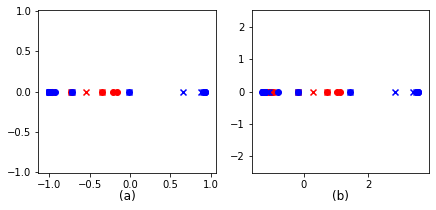

3000 	 0.77156007 	 0.56508631 	 0.67209876


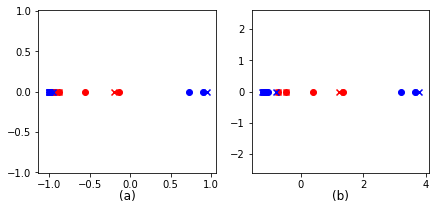

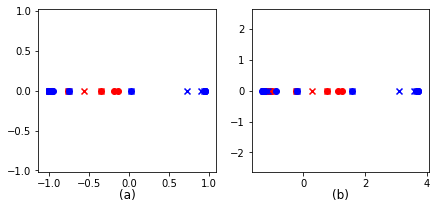

3500 	 0.76971519 	 0.56131178 	 0.67167193


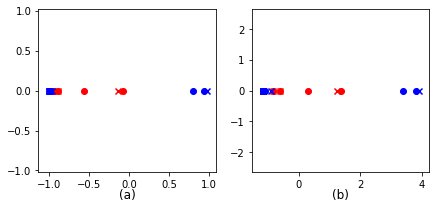

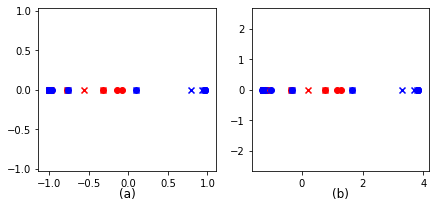

4000 	 0.76840979 	 0.55920440 	 0.67137760


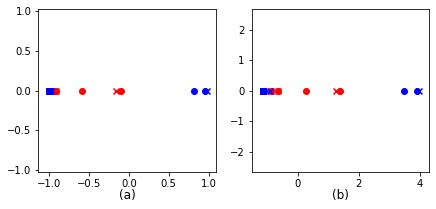

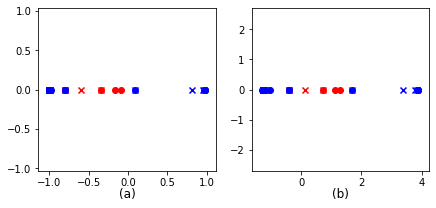

4500 	 0.76748884 	 0.55730355 	 0.67125994


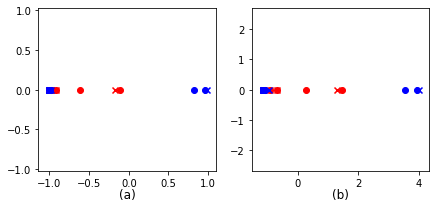

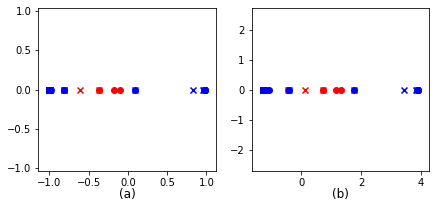

5000 	 0.76693207 	 0.55554980 	 0.67113698


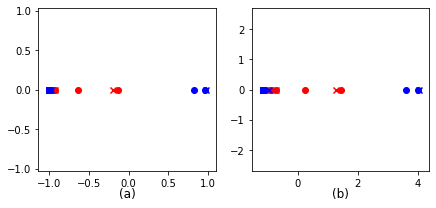

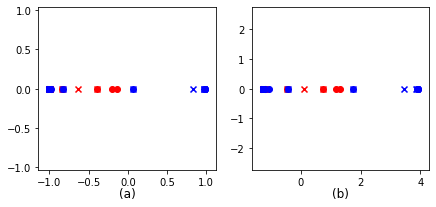

5500 	 0.76635790 	 0.55458170 	 0.67145580


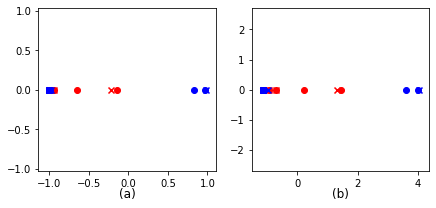

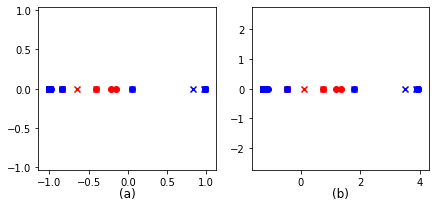

6000 	 0.76590943 	 0.55368924 	 0.67110944


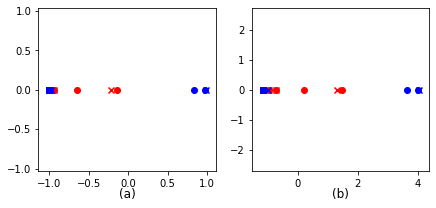

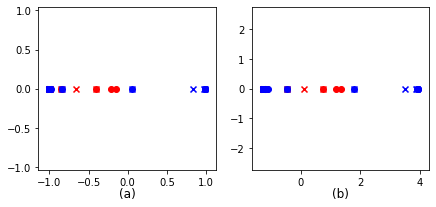

6500 	 0.76565373 	 0.55320203 	 0.67115974


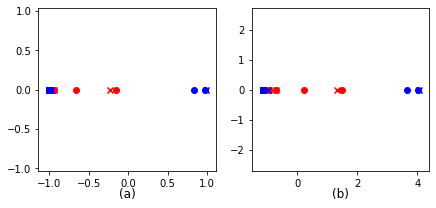

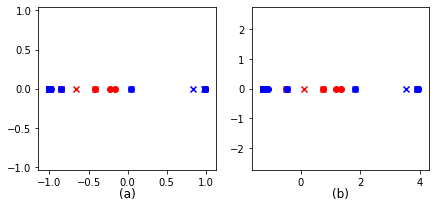

7000 	 0.76540577 	 0.55275446 	 0.67124552


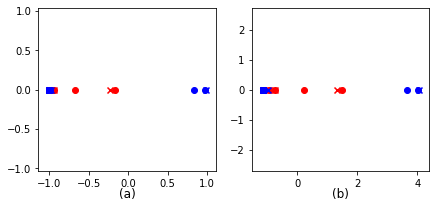

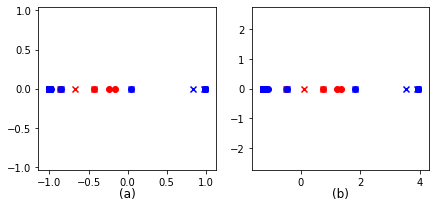

7500 	 0.76527476 	 0.55237806 	 0.67120773


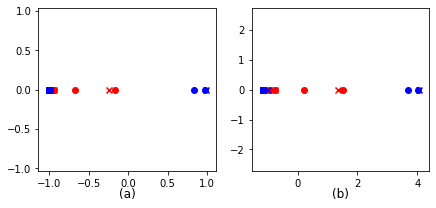

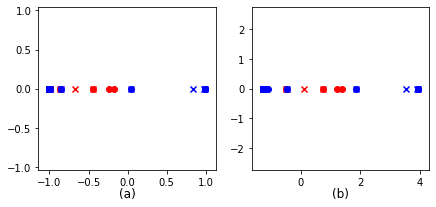

8000 	 0.76523101 	 0.55238295 	 0.67098689


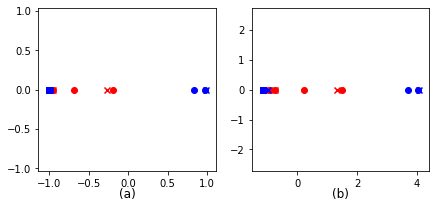

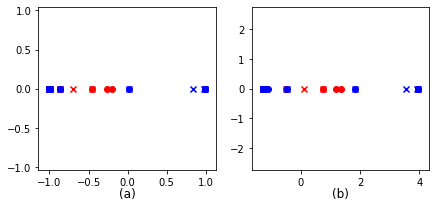

8500 	 0.76544189 	 0.55199105 	 0.67111546


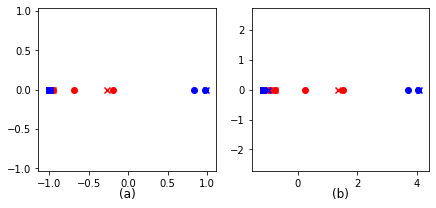

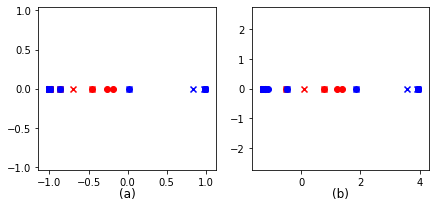

9000 	 0.76510549 	 0.55209005 	 0.67127371


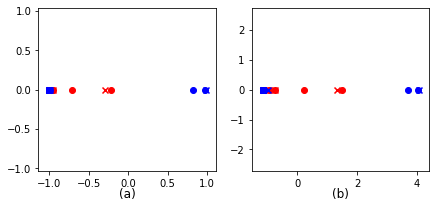

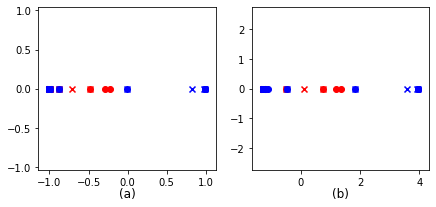

9500 	 0.76495457 	 0.55180877 	 0.67112547


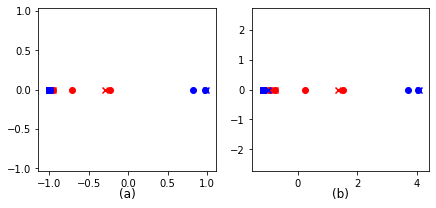

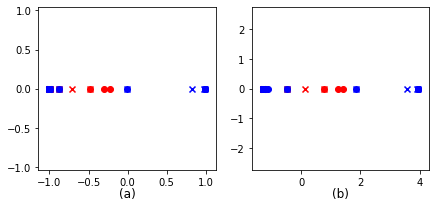

10000 	 0.76500356 	 0.55188709 	 0.67094445


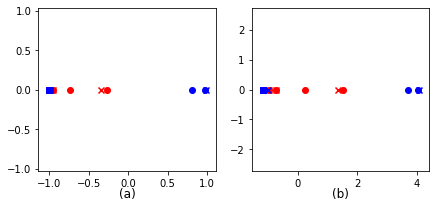

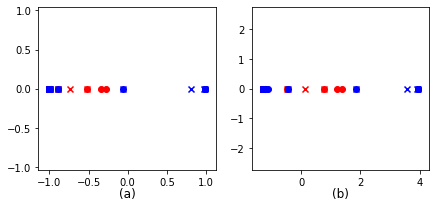

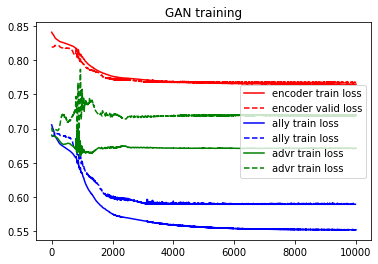

epoch 	 encoder_train 	 ally_train 	 advr_train
0 	 0.83788347 	 0.69970149 	 0.68606651


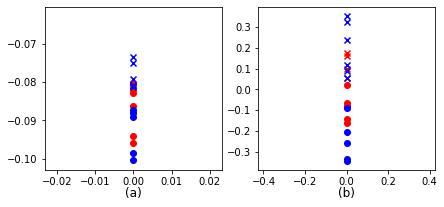

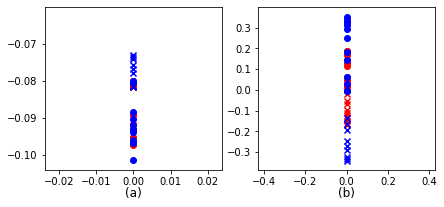

500 	 0.82263887 	 0.66946620 	 0.69204313


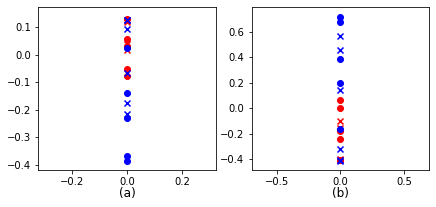

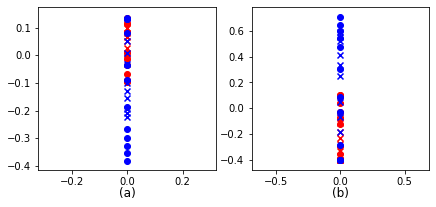

1000 	 0.78089583 	 0.58546728 	 0.68715662


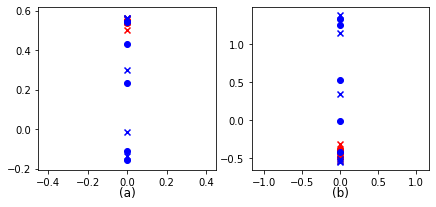

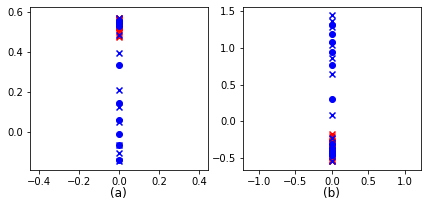

1500 	 0.75402987 	 0.53046942 	 0.67280221


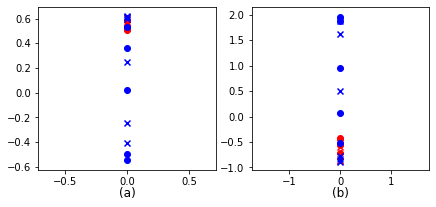

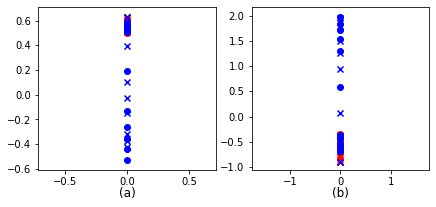

2000 	 0.74266744 	 0.50928348 	 0.68881404


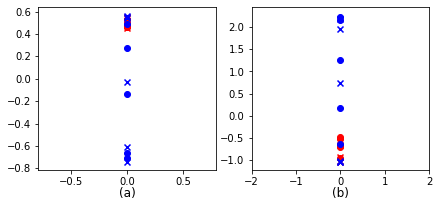

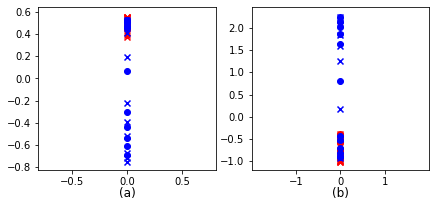

2500 	 0.73899591 	 0.50038141 	 0.67679238


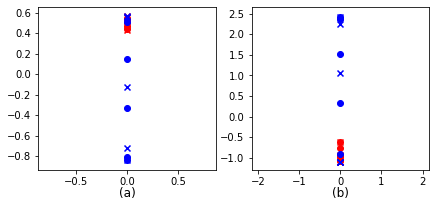

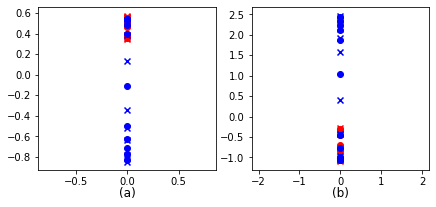

3000 	 0.73715466 	 0.49651587 	 0.67240685


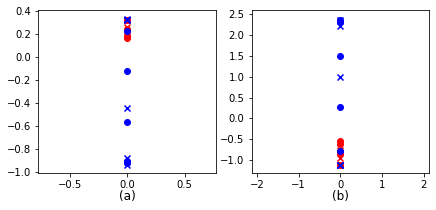

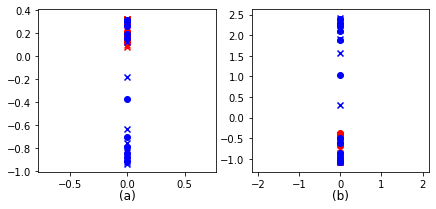

3500 	 0.73575050 	 0.49346656 	 0.67430693


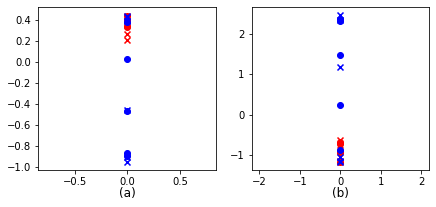

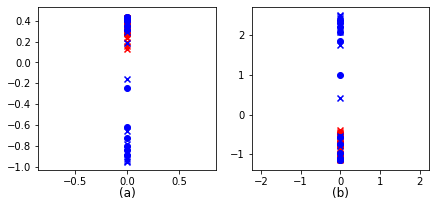

4000 	 0.73463756 	 0.49185914 	 0.67788893


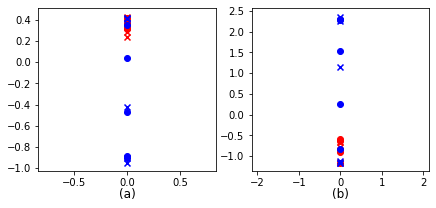

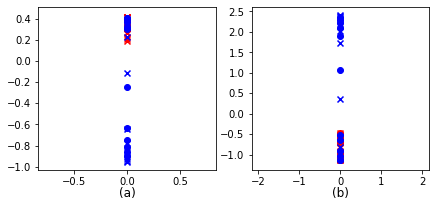

4500 	 0.73452288 	 0.49125978 	 0.67697036


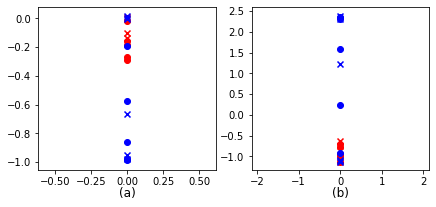

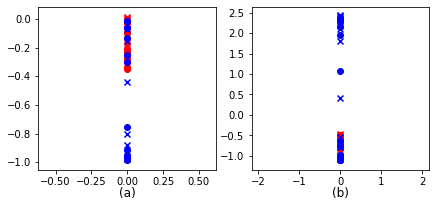

5000 	 0.73460907 	 0.49077567 	 0.66696018


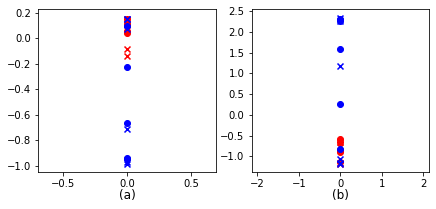

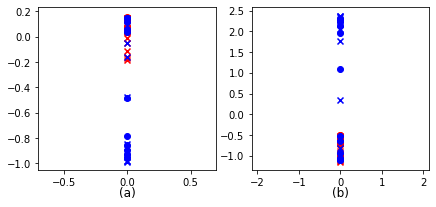

5500 	 0.73421323 	 0.49000275 	 0.67047828


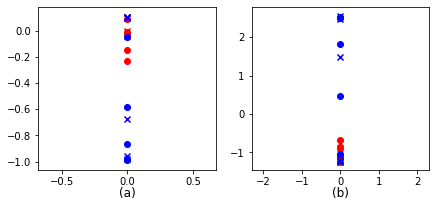

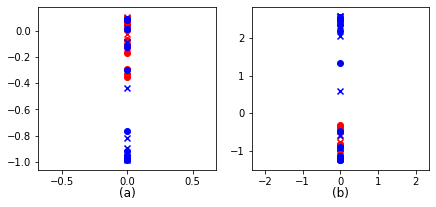

6000 	 0.73429811 	 0.48976663 	 0.67605424


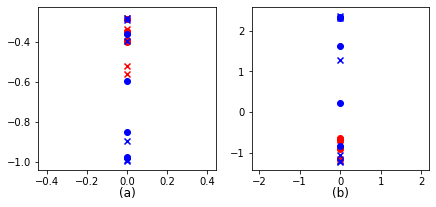

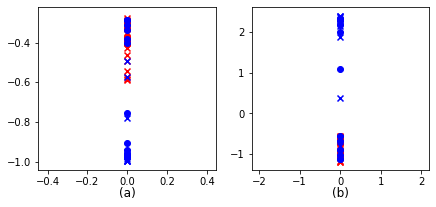

6500 	 0.73224407 	 0.48929322 	 0.69314730


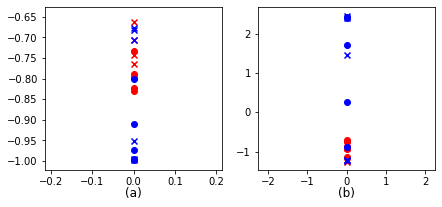

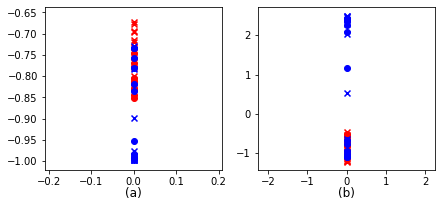

7000 	 0.73214495 	 0.48908442 	 0.69314730


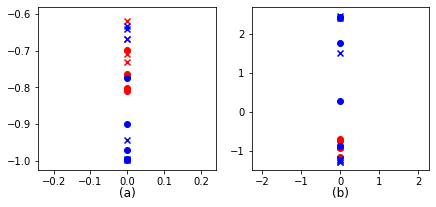

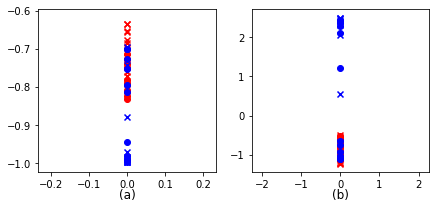

7500 	 0.73202395 	 0.48883647 	 0.69314730


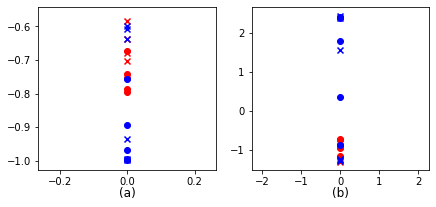

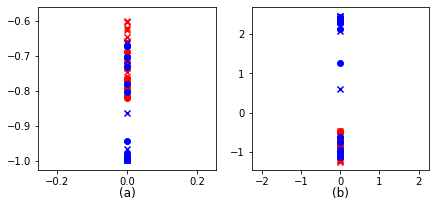

8000 	 0.73196983 	 0.48872921 	 0.69314730


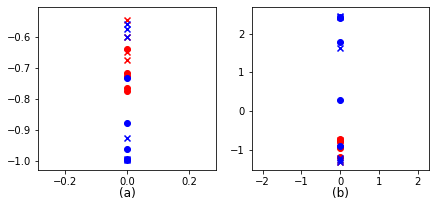

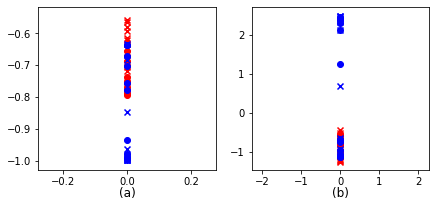

8500 	 0.73192680 	 0.48864430 	 0.69314730


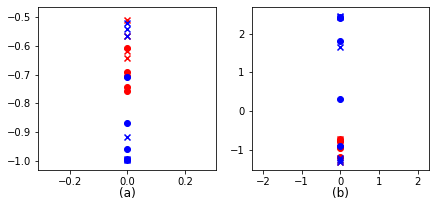

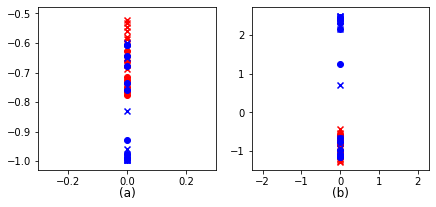

9000 	 0.73192680 	 0.48864433 	 0.69314730


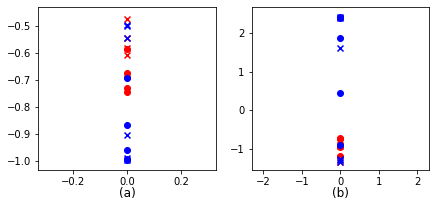

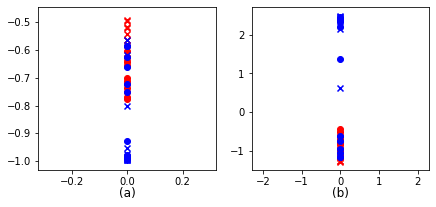

9500 	 0.73187947 	 0.48855031 	 0.69314730


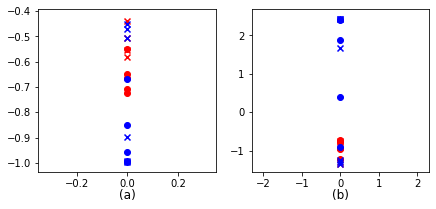

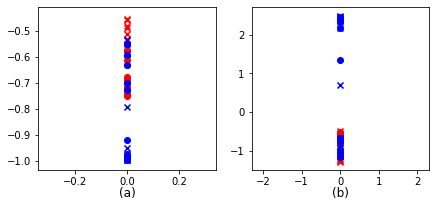

10000 	 0.73183298 	 0.48848027 	 0.69314730


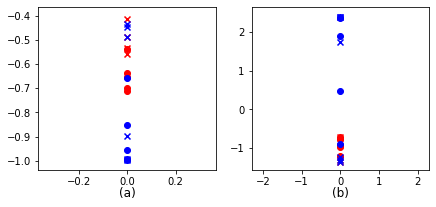

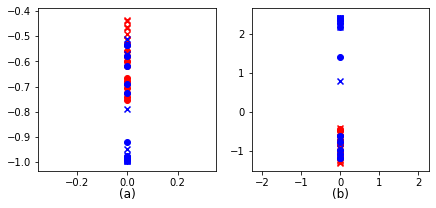

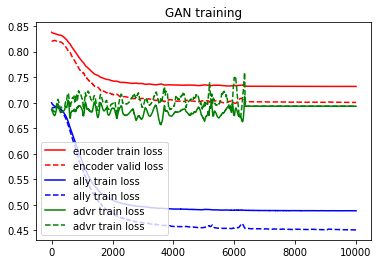

In [36]:
for i in range(X_normalized.shape[1]):
    X_torch = torch.Tensor(X_normalized[:, i].reshape(-1, 1))
    y_ally_torch = torch.Tensor(y_ally.reshape(-1, 1))
    y_advr_torch = torch.Tensor(y_advr.reshape(-1, 1))

    X_torch_valid = torch.Tensor(X_normalized_valid[:, i].reshape(-1, 1))
    y_ally_torch_valid = torch.Tensor(y_ally_valid.reshape(-1, 1))
    y_advr_torch_valid = torch.Tensor(y_advr_valid.reshape(-1, 1))

    encoder = train_privacy_gan(2, alpha, lr_encd, lr_ally, lr_advr, n_iter_gan, d_reps, plot=True, debug=True, axis=i)

In [43]:
encoder.eval()
encoded = []
encoded_valid = []
for i in range(X_normalized.shape[1]):
    X_torch = torch.Tensor(X_normalized[:, i].reshape(-1, 1))
    X_torch_valid = torch.Tensor(X_normalized_valid[:, i].reshape(-1, 1))
    encoded.append(encoder(X_torch).detach().numpy())
    encoded_valid.append(encoder(X_torch_valid).detach().numpy())

In [44]:
X = np.hstack(encoded)
X_valid = np.hstack(encoded_valid)

In [45]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_valid_pca = pca.transform(X_valid)
X_pca.shape, X_valid_pca.shape

((44, 2), (20, 2))

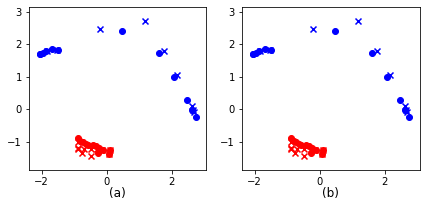

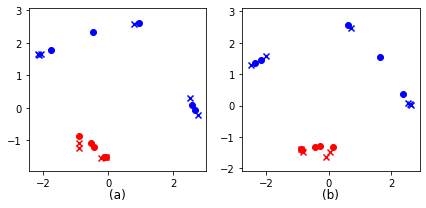

In [46]:
class_plot(X_pca, y_ally, y_advr)
class_plot(X_valid_pca, y_ally_valid, y_advr_valid)

In [ ]:
encoder.eval()
X_ganencoded = encoder(X_torch)

# Training Independently

In [ ]:
encoding_dimension = 2
encoder.eval()

In [ ]:
ally = Ally(
    input_size=encoding_dimension*4, 
    hidden_size=encoding_dimension*8, 
    output_size=y_ally_torch.shape[1])
ally_optimizer = optimizer(ally.parameters(), lr=0.001)

print("epoch \t ally_train")

ally.train()

n_iter = 10001
    
for epoch in range(n_iter):
    X_ganencoded = encoder(X_torch)
    y_ally_torch_hat = ally(X_ganencoded)
    ally_optimizer.zero_grad()
    ally_loss = criterion(y_ally_torch_hat, y_ally_torch)
    ally_loss.backward()
    ally_optimizer.step()
    
    if epoch%1000!=0:
        continue

    print('{} \t {:.8f}'.format(
        epoch, 
        ally_loss.item(),
    ))
    

In [ ]:
adversary = Adversary(
    input_size=encoding_dimension*4, 
    hidden_size=encoding_dimension*8, 
    output_size=y_advr_torch.shape[1])

advr_optimizer = optimizer(adversary.parameters(), lr=lr_ally)

print("epoch \t advr_train")

adversary.train()
    
for epoch in range(n_iter):
    X_ganencoded = encoder(X_torch)
    y_advr_torch_hat = adversary(X_ganencoded)
    advr_optimizer.zero_grad()
    advr_loss = criterion(y_advr_torch_hat, y_advr_torch)
    advr_loss.backward()
    advr_optimizer.step()
    
    if epoch%1000!=0:
        continue
    
    print('{} \t {:.8f}'.format(
        epoch, 
        advr_loss.item(),
    ))
    

# DP

In [ ]:
def laplaceMechanism(x, epsilon):
    return x + np.random.laplace(0, 1.0/epsilon, x.shape)

In [ ]:
epsilons = [1, 10, 100, 1000]
for epsilon in epsilons:
    X_dp = laplaceMechanism(X_normalized, epsilon)

    class_plot(X_dp, title="DP at epsilon={}".format(epsilon))

In [ ]:
np.random.laplace(0, 1.0/100000, X_dp.shape)